Read DF's

In [1]:
import numpy as np
import pandas as pd

us_trending_df = pd.read_csv("./data/stage_1_us_trending.csv")
color_text_df = pd.read_csv("./data/stage_2_thumbnail_colors_and_text.csv")
face_df = pd.read_csv("./data/stage_2_thumbnail_face.csv")
objects_df = pd.read_csv("./data/stage_2_thumbnail_objects_vectors.csv")

Merge DF's

In [2]:
df = pd.concat([us_trending_df, color_text_df, face_df, objects_df], axis=1)
df.head()

,channelId,channelTitle,trending_date,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,...,parking meter,skis,fork,cow,snowboard,fire hydrant,elephant,carrot,zebra,hair dryer
0,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2020-08-12,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,2020-08-12,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UCbg_UMjlHJg_19SZckaKajg,XXL,2020-08-12,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,2020-08-12,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Drop one of highly correlated attributes

In [3]:
corr_matrix = df.corr(method='spearman')

target_attr = 'likes'
corr_attr_threshold = 0.8
drop_set = set()

corr_matrix_filtered = corr_matrix[(abs(corr_matrix) > corr_attr_threshold) & (corr_matrix < 1.0)]

for k in corr_matrix_filtered:
    dct = dict(corr_matrix_filtered[k].dropna())

    for k2 in dct:
        if abs(corr_matrix[k][target_attr]) > abs(corr_matrix[k2][target_attr]):
            drop_set.add(k2)
        else:
            drop_set.add(k)

# for col in drop_set:
#     df.drop(col, axis=1, inplace=True)

print(drop_set)

{'thumbnail_face_emotion_neutral', 'thumbnail_med_value', 'thumbnail_face_dominant_race', 'thumbnail_face_race_middle_eastern', 'thumbnail_avg_saturation', 'thumbnail_face_race_latino_hispanic', 'thumbnail_has_face', 'thumbnail_face_race_indian', 'thumbnail_face_emotion_sad', 'thumbnail_face_emotion_disgust', 'thumbnail_face_emotion_fear'}


Calculate correlations between attributes and target class

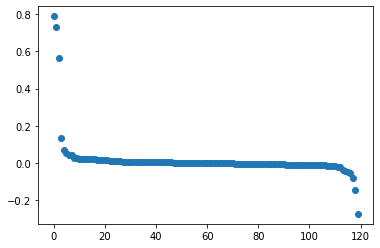

In [4]:
from matplotlib import pyplot as plt

corr_matrix_filtered = dict(df.corr(method='spearman')[target_attr].drop(target_attr).dropna())
corr_matrix_filtered = dict(sorted(corr_matrix_filtered.items(), key=lambda item: item[1], reverse=True))

plt.scatter(range(len(corr_matrix_filtered)), corr_matrix_filtered.values())

Find attributes with small correlation

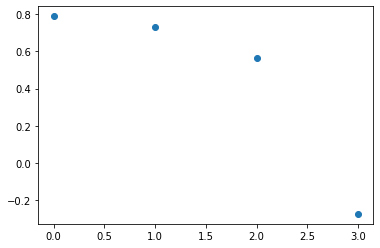

In [5]:
corr_target_threshold = 0.2

for k in list(corr_matrix_filtered.keys()):
    if abs(corr_matrix_filtered[k]) < corr_target_threshold:
        corr_matrix_filtered.pop(k)

plt.scatter(range(len(corr_matrix_filtered)), corr_matrix_filtered.values())

Drop attributes with small correlation from data and save to csv

In [6]:
columns_to_drop = [ele for ele in list(df.columns) if ele not in list(corr_matrix_filtered.keys())]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df.to_csv("./data/stage_3_feature_importance.csv")
df.head()

,view_count,dislikes,comment_count,title_length
0,1514614,5855,35313,34
1,2381688,2794,16549,60
2,2038853,2628,40221,53
3,496771,1856,7647,56
4,1123889,964,2196,55
